# Analysis of the Properties of Mushrooms
## Lab One: Exploring Table Data
### Luke Wood, Justin Ledford, Traian Pop
___

## Introduction
Mushrooms are a type of fungus found in many, if not all, parts of the world, that have been used throughout history in a variety of fields. Fungi are extracted for both their beneficial and harmful properties. There is an entire subsector of biology dedicated to studying how mushrooms develop and evolve. After searching, we decided to focus on a specific set found on the UCI website due to the variety of attributes in the report. 

___

## Business Understanding

### Data Background
<p align="justify">The data we have selected to study is the analysis of 23 different gilled mushroom species of the *Agaricus* and *Lepiota* Families. Originally, this was collected in order to discover a more efficient and accurate way to tell if a mushroom is edible or poisonous as part of a field guide. This information was found on the UCI, collected by The Audubon Society Field Guide to North American Mushrooms (1981), and donated by Jeff Schlimmer.
<br><br>
The Aubudon Society collects information on over 700 different species of North American Mushrooms and compiles them in a concise and easy to understand handbook. Every aspect of a mushroom is detailed as to make it as simple as possible for anyone to differentiate one in the field. 
<br><br>
We believe that this information could be used to create an effective classifier.  All of the attributes, excluding poisonousness, are easy observable, and have a high correlation with whether or not a mushroom is poisonous or edible.  
</p>


### Purpose

This kind of information is vital to many industries, ranging from tourism to healthcare. Having the knowledge of whether a mushroom is usable or not could save a starving hiker's life or speed up the process of developing medicines involving those materials. Although most poisonous mushrooms only cause minor symptoms such as vomiting and diarrhea, children or animals can develop symptoms such organ damage and, in some cases, death. The field is currently based on a lot of guesswork and tedious work, and even professional mushroomers can misidentify a specimen.

We want to analyze this data in order to discern a mushrooms edibleness by a combination of its properties.  
___


## Data Understanding

![Cross section](http://michaelagleatonportfolio2014.weebly.com/uploads/2/6/4/0/26406357/570473033.gif "Cross section")
The picture shows a typical Blue Milk Mushrooms.This has been added to aid in seeing where each attribute lies on the mushroom itself.

The following are our 23 categorical data attributes that will be examined in this report, grouped by the parts and functions of the mushroom:
   
  * <b>Cap Information</b>(*OHE*)  - Attributes relating to the mushroom cap, the part of the mushroom that protects the gills from harm
     * <b>Cap Shape</b>(*OHE*) 
     * <b>Cap Surface</b>(*OHE*) 
     * <b>Cap Color</b>(*OHE*)
  * <b>Odor</b>(*OHE*) - The aroma a mushroom gives off
  * <b>Gill Information</b>(*OHE*) - Attributes relating to the mushroom gills, the part of the mushroom that releases spores
      * <b>Gill Attachment</b>(*OHE*)
      * <b>Gill Spacing</b>(*OHE*)
      * <b>Gill Color</b>(*OHE*)
      * <b>Gill Size</b>(*Binary*)
  * <b>Stalk Information</b> - Attributes relating to the mushroom gills, the part of the mushroom that holds the cap up
      * <b>Stalk Root</b>(*OHE*)
      * <b>Stalk Shape</b>(*Binary*) 
      * <b>Stalk Surface Above Ring</b>(*OHE*)
      * <b>Stalk Surface Below Ring</b>(*OHE*)
      * <b>Stalk Color Above Ring</b>(*OHE*)
      * <b>Stalk Color Below Ring</b>(*OHE*)
  * <b>Veil Information</b>(*OHE*) - Attributes relating to the mushroom veil, the part of the mushroom that is used for protection of the spores
      * <b>Veil Color</b>(*OHE*) 
      * <b>Veil Type</b>(*Binary*) 
  * <b>Ring Information</b>(*OHE*) - Attributes pertaining to a mushroom ring, a vestigial protective covering for the mushroom
      * <b>Ring Number</b>(*OHE*) 
      * <b>Ring Type</b>(*OHE*)
  * <b>Spore Print Color</b>(*OHE*) - Mushrooms use spore to reproduce, typically different colors among species
  * <b>Population</b>(*OHE*) - How the mushroom grows in terms of clusters
  * <b>Habitat</b>(*OHE*) - Where the mushroom typically grows in the wild
  * <b>Bruises</b>(*Binary*) - Whether or not a mushroom has surface bruises
  * <b>Poisonous</b>(*Binary*) - Attribute labeling if a mushroom is edible or poisonous
   
  (*OHE*) - One Hot Encoding
     
Although the above attributes can be assigned to specific data representations, we decided to not go along with it as our data set was not memory intensive enough to require it. Leaving them in their categorical representation also allowed the data to be read easier and understood.
___

## Data Quality

### Loading & Preprocessing Data

In [1]:
import pandas as pd
import numpy as np
import requests

descriptors_url = 'https://raw.githubusercontent.com/LukeWoodSMU/Mushroom-Classification/master/raw_data/descriptors.txt'
descriptors = requests.get(descriptors_url).text

def get_attribute_dictionary():
    # Loads from the descriptors file all attributes w/ mapping to their mappings
    attr_dict = dict([(x.split(":")[0],dict([[y.split("=")[1].strip(),y.split("=")[0].strip()] for y in x.split(":")[1].split(",")])) for x in descriptors.splitlines()])
    attr_dict.pop('stalk-root', None)
    return attr_dict
    

def get_data_frame(remove_dups=False):
    attribute_names = [x.split(":")[0] for x in descriptors.splitlines()]
    df = pd.read_csv('https://raw.githubusercontent.com/LukeWoodSMU/Mushroom-Classification/master/raw_data/agaricus-lepiota.data.txt',names=attribute_names)

    for col in df.columns:
        df[col] = df[col].astype('category')

    if(remove_dups):
        df = df.drop_duplicates()
    
    df.drop('stalk-root', inplace=True, axis=1)
    
    return df



Below are the first 5 instances of our data set.

In [2]:
get_data_frame().head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Missing Values
The data sets has 2480 missing values, all for one attribute, the stalk root. These missing values most likely exist because the stalk root is the only attribute that could not be visible unless the mushroom had been pulled out of the ground.

To deal with these missing values we can either eliminate the instances with missing values or eliminate the column altogether since it would be difficult to impute the values with this data set. We have decided to eliminate the column because the attribute is not relevant in the case of determining the edibility of the mushroom without removing it from the ground, which was the main thing we were interested in analyzing.

In [34]:
def get_data_frame_with_miss(remove_dups=False):
    attribute_names = [x.split(":")[0] for x in descriptors.splitlines()]
    df = pd.read_csv('https://raw.githubusercontent.com/LukeWoodSMU/Mushroom-Classification/master/raw_data/agaricus-lepiota.data.txt',names=attribute_names)

    for col in df.columns:
        df[col] = df[col].astype('category')

    if(remove_dups):
        df = df.drop_duplicates()
            
    return df

def get_attribute_dictionary_with_miss():
    # Loads from the descriptors file all attributes w/ mapping to their mappings
    attr_dict = dict([(x.split(":")[0],dict([[y.split("=")[1].strip(),y.split("=")[0].strip()] for y in x.split(":")[1].split(",")])) for x in descriptors.splitlines()])
    return attr_dict
    

missing_val=get_data_frame_with_miss()
missing_val['stalk-root'].head()

0    e
1    c
2    c
3    e
4    e
Name: stalk-root, dtype: category
Categories (5, object): [?, b, c, e, r]

### Single Value Column
We also noticed that in the veil-type column, only one value was present.  This makes the column completely irrelevant.  This likely means that of the 23 species studied none of them had a veil-type of anything other than partial. 
This is interesting to see but not necessarily surprising, as even though the species come from two different attributes, they are still fairly similar biologically. 

In [35]:
single_val=get_data_frame()
single_val['veil-type'].head()


0    p
1    p
2    p
3    p
4    p
Name: veil-type, dtype: category
Categories (1, object): [p]

### Repeat Data
Due to there being 8124 rows and only 23 species of mushrooms, we assumed that there would inevitably be lot of identical rows.  Although generally removing duplicate data seems like something that needs to be done, we decided that situations would arise when the duplicate data would be useful.

In order to achieve this dual functionality, we implementing our function that reads the DataFrame from a file, to have the option to remove duplicate values. 

Below is a short piece of code showing what percentage of the data is unique.

In [36]:
df = get_data_frame()
total_rows = len(df)

df.drop_duplicates(inplace=True)
no_dups = len(df)

print ("Total duplicates: ", (total_rows - no_dups))

Total duplicates:  0


We were surprised to see that there were zero duplicates in the entire set, but once we sat down and analyzed the data more, we came up with a few possible conclusions.

1. The original data collectors already had the data removed.
2. Some of the missing data ended up being the duplicate data.
3. There was never any duplicate data to begin with.

In [37]:
df = get_data_frame()
p = 1
for col in df:
    p *= (1/len(df[col].cat.categories))
print (p**2)

4.206045380432561e-28


The chances of not having a single duplicate specimen with 28 different attributes and each attribute having a different number of variables is 1.683e-26%. Due to this probability, we are inclined to go with conclusion #3 regarding the reason for zero duplicate data.

### Initial Analysis

One of the first things we did was analyze the data by getting the ratios of an attribute value's occurrence in all the instances to that value's occurrence in the poisonous instances to determine which attributes had values that only or mostly occurred in poisonous mushrooms.

In [38]:
def get_hist_data():
    attr_map = get_attribute_dictionary()
    df = get_data_frame()

    hist_data = dict([(atr,None) for atr in attr_map])
    poison_hist_data = dict([(atr,None) for atr in attr_map])

    for x in attr_map:
        counts = dict([(attr_map[x][y],0) for y in attr_map[x]])
        poison_counts = dict([(attr_map[x][y],0) for y in attr_map[x]])

        for val, poison in zip(df[x],df["poisonous"]):
            counts[attr_map[x][val]]+=1
            if(poison == "p"):
                poison_counts[attr_map[x][val]]+=1
        hist_data[x] = counts
        poison_hist_data[x] = poison_counts

    return hist_data, poison_hist_data

#tf_tpf - Term Frquency to Poison Frequency
def get_tf_tpf():
    data,poison_data = get_hist_data()
    tf_tpf = {}

    for val in data:
        tf_tpf[val] = dict([(x,poison_data[val][x]/data[val][x]) for x in data[val] if data[val][x] != 0])
    return tf_tpf

counts, poison_counts = get_hist_data()

tf_tpf = {}
for val in counts:
    tf_tpf[val] = dict([(x,poison_counts[val][x]/counts[val][x]) for x in counts[val] if counts[val][x] != 0])

print(tf_tpf["odor"])

{'spicy': 1.0, 'fishy': 1.0, 'foul': 1.0, 'pungent': 1.0, 'anise': 0.0, 'musty': 1.0, 'creosote': 1.0, 'almond': 0.0, 'none': 0.034013605442176874}


As we can see, the correlations between certain values of the odor attribute and whether or not a mushroom is poisonous is 100%.  The only time that there is a question of whether or not a mushroom is poisonous is when the mushroom lacks an odor. From here we decided to start plotting the data to get a visual sense of the relationship between attributes.
___

## Visualizations

We will be using Matplotlib's pylot and Seaborn to plot our data.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

### Comparative bar charts

In order to get a glimpse of what specific attribute values could be used to determine if a mushroom was edible or poisonous we generated some bar charts to compare the attribute values by poisonous and edible mushrooms.

Since most relationships between categorical variables are usually analyzed by looking at the frequencies of those variables we have implemented a function that can be used to collect the frequencies of each attribute value for two attributes.

In [9]:
def attr_freqs(attr1, attr2):
    df = get_data_frame()

    labels1 = get_attribute_dictionary()[attr1]
    labels2 = get_attribute_dictionary()[attr2]

    data = []

    for a in df[attr1].cat.categories:
        column = df[attr2][df[attr1] == a].value_counts()
        data.append(column)

    observed = pd.concat(data, axis=1)
    observed.columns = [labels1[a] for a in df[attr1].cat.categories]

    return observed


attr_freqs('odor', 'poisonous')

,almond,creosote,foul,anise,musty,none,pungent,spicy,fishy
e,400,0,0,400,0,3408,0,0,0
p,0,192,2160,0,36,120,256,576,576


Since we would like to compare attributes against the poisonous and edible classes, we have created a function to plot any attribute with side by side bar charts comparing each of the values of that attribute.

In [10]:
def plot_comparative_data(attr, plot=True, save=False):
    data = attr_freqs(attr, 'poisonous')

    labels = get_attribute_dictionary()[attr]

    index = np.arange(data.shape[1])
    bar_width = 0.35
    opacity=0.4

    fig, ax = plt.subplots()

    plt.bar(index, data.loc['e',:].values, bar_width, align='center',
            color='b', label='edible', alpha=opacity)
    plt.bar(index + bar_width, data.loc['p',:].values, bar_width,
            align='center', color='r', label='poisonous', alpha=opacity)

    plt.xlabel('Attributes')
    plt.ylabel('Frequency')
    plt.title('Frequency by attribute and edibility ({})'.format(attr))
    plt.xticks(index + bar_width / 2, data.columns)

    plt.legend()

    plt.tight_layout()
    plt.show()
    plt.close()

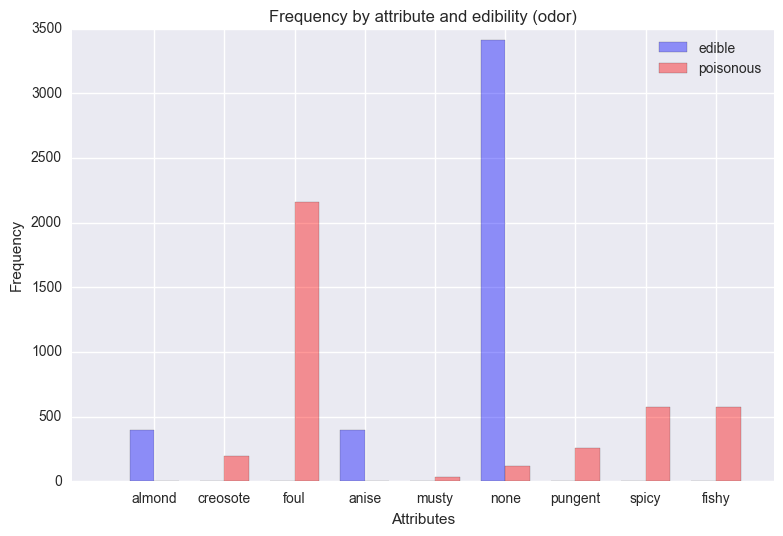

In [11]:
plot_comparative_data('odor')

From the plot we can see that any mushroom with a foul, spicy and fishy smell as almost certainly poisonous. No smell is almost always edible, but in some rare cases it can be poisonous.

Let's take a look at spore print color.

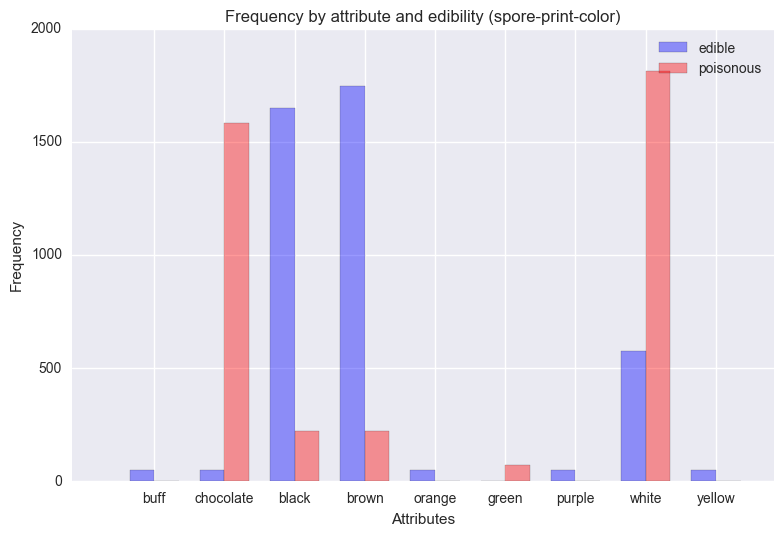

In [12]:
plot_comparative_data('spore-print-color')

We can see that chocolate and white mushrooms are usually poisonous so it is best to avoid those. Black or brown are usually edible, but not always.

### Determining an attribute's association with edibility

To determine association between attributes and edibility we used Pearson's chi-squared test on the frequency of attribute values and then ordered the attributes in descending order of the chi-squared statistic. The chi-squared test works by comparing the observed data to expected data (the null hypothesis which is an even distribution across each row and column) with the following equation,

$$
    \chi^2 = \sum^n_{i=1} \frac{ (O_i - E_i)^2 }{ E_i }
$$

where $O$ is the observed data point and $E$ is the expected data point.

With the following function we can get a contingency table of the expected and observed values of any two attributes:

In [13]:
def expected_data(observed):
    expected = np.zeros(observed.shape)

    total = observed.sum().sum()
    for j in [0, 1]:
        for i, col_total in enumerate(observed.sum()):
            row_total = observed.sum(axis=1)[j]
            expected[j][i] = row_total*col_total/total

    return pd.DataFrame(expected, index=observed.index,
                        columns=observed.columns)

In [14]:
o = attr_freqs('odor', 'poisonous')
o

,almond,creosote,foul,anise,musty,none,pungent,spicy,fishy
e,400,0,0,400,0,3408,0,0,0
p,0,192,2160,0,36,120,256,576,576


In [15]:
expected_data(o)

,almond,creosote,foul,anise,musty,none,pungent,spicy,fishy
e,207.188577,99.450517,1118.818316,207.188577,18.646972,1827.40325,132.600689,298.351551,298.351551
p,192.811423,92.549483,1041.181684,192.811423,17.353028,1700.59675,123.399311,277.648449,277.648449


Using these two tables for each attribute we can collect the chi-squared test statistic for each, and then sort them in descending order to rank the attributes by association with being poisonous or edible.

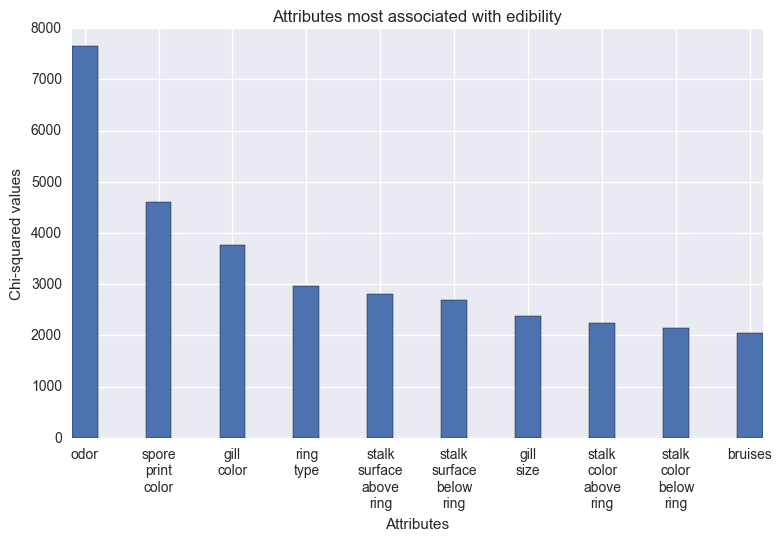

In [16]:
cat_names = get_attribute_dictionary().keys()

chisqrs = []
for cat in cat_names:
    if cat != 'poisonous':
        observed = attr_freqs(cat, 'poisonous')
        expected = expected_data(observed)
        chisqr = (((observed-expected)**2)/expected).sum().sum()
        chisqrs.append((chisqr, cat))

chisqrs = sorted(chisqrs)[::-1]
chisqrs = chisqrs[:10]
values = [d[0] for d in chisqrs]
labels = [d[1].replace("-", "\n") for d in chisqrs]

index = np.arange(len(chisqrs))
bar_width = .35
opacity=0.4

plt.title("Attributes most associated with edibility")
plt.bar(index, values, bar_width, align='center')
plt.xticks(index, labels)
plt.ylabel("Chi-squared values")
plt.xlabel("Attributes")
plt.autoscale()
plt.tight_layout()
plt.show()

As we can see from the plot, odor is the most associated attribute with edibility, followed by spore print color and gill color. These rankings seem to agree heavily with our comparative barcharts.

While this use of the chi-squared test statistic may not be the traditional use of finding the p-value and accepting or rejecting the null hypothesis to determine independence, it still provided us with a metric to rank the attributes by their association of edibility.

### Scatterplot

Next we decided to plot a scatterplot matrix of the top 5 most associated attributes with edibility. In order to plot categorical variables on a scatterplot we needed to add some jitter to the data. This was done by adding a random number between -0.167 and 0.167 to all the categorical codes.

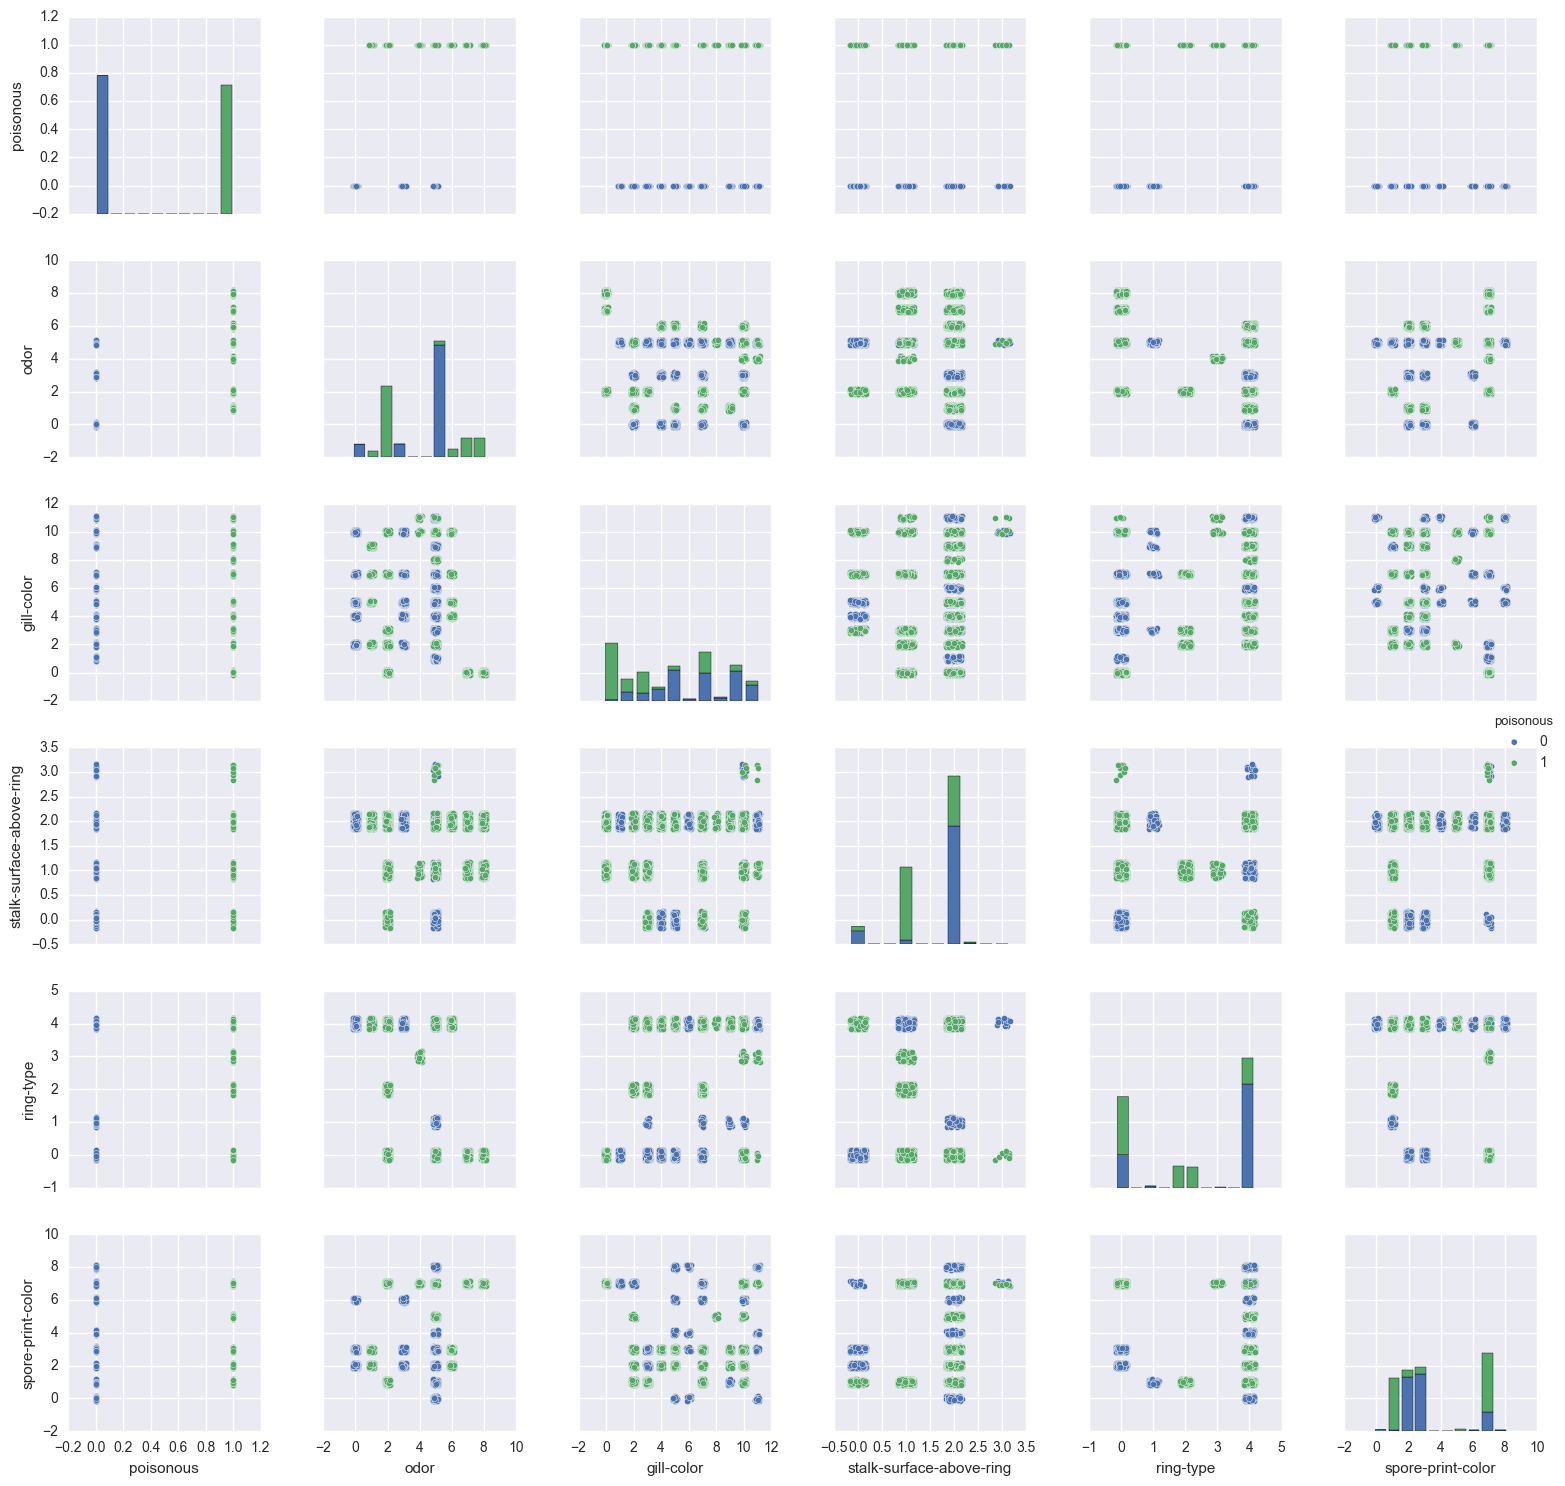

In [19]:
df = get_data_frame()
for col in df:
    if col in ['odor', 'spore-print-color', 'gill-color', 'ring-type',
               'stalk-surface-above-ring']:
        df[col] = df[col].cat.codes + (np.random.rand(len(df),) - .5)/3
    elif col == 'poisonous':
        df[col] = df[col].cat.codes
    else:
        del df[col]

g = sns.pairplot(df, hue='poisonous')
plt.autoscale()
plt.tight_layout()
plt.show()
plt.close()

From the scatter plots we can clearly see how values of certain variables are grouped between poisonous and edible. We can also see how combinations of two variable values strongly correlate to belonging to a poisonous or edible mushroom.
For example a fibrous stalk surface above ring and an evanescent ring type are almost certainly edible, however a fibrous stalk surface ring and a pendant ring type are almost certainly poisonous.

Because the values were converted to the categorical codes to plot, we have generated a legend for the values of each attribute.

In [21]:
df = get_data_frame()
attr = get_attribute_dictionary()
labels = {}
for col in df:
        if col in ['odor', 'spore-print-color', 'gill-color', 'ring-type',
                               'stalk-surface-above-ring', 'poisonous']:
            labels[col] = [attr[col][c] for c in df[col].cat.categories] + \
                          (12-len(df[col].cat.categories))*[" "]
pd.DataFrame(labels)

,gill-color,odor,poisonous,ring-type,spore-print-color,stalk-surface-above-ring
0,buff,almond,edible,evanescent,buff,fibrous
1,red,creosote,poisonous,flaring,chocolate,silky
2,gray,foul,,large,black,smooth
3,chocolate,anise,,none,brown,scaly
4,black,musty,,pendant,orange,
5,brown,none,,,green,
6,orange,pungent,,,purple,
7,pink,spicy,,,white,
8,green,fishy,,,yellow,
9,purple,,,,,


### Heatmaps
To get a better sense of the correlations we wanted to create a heat map that showed the correlation between all possible attributes.

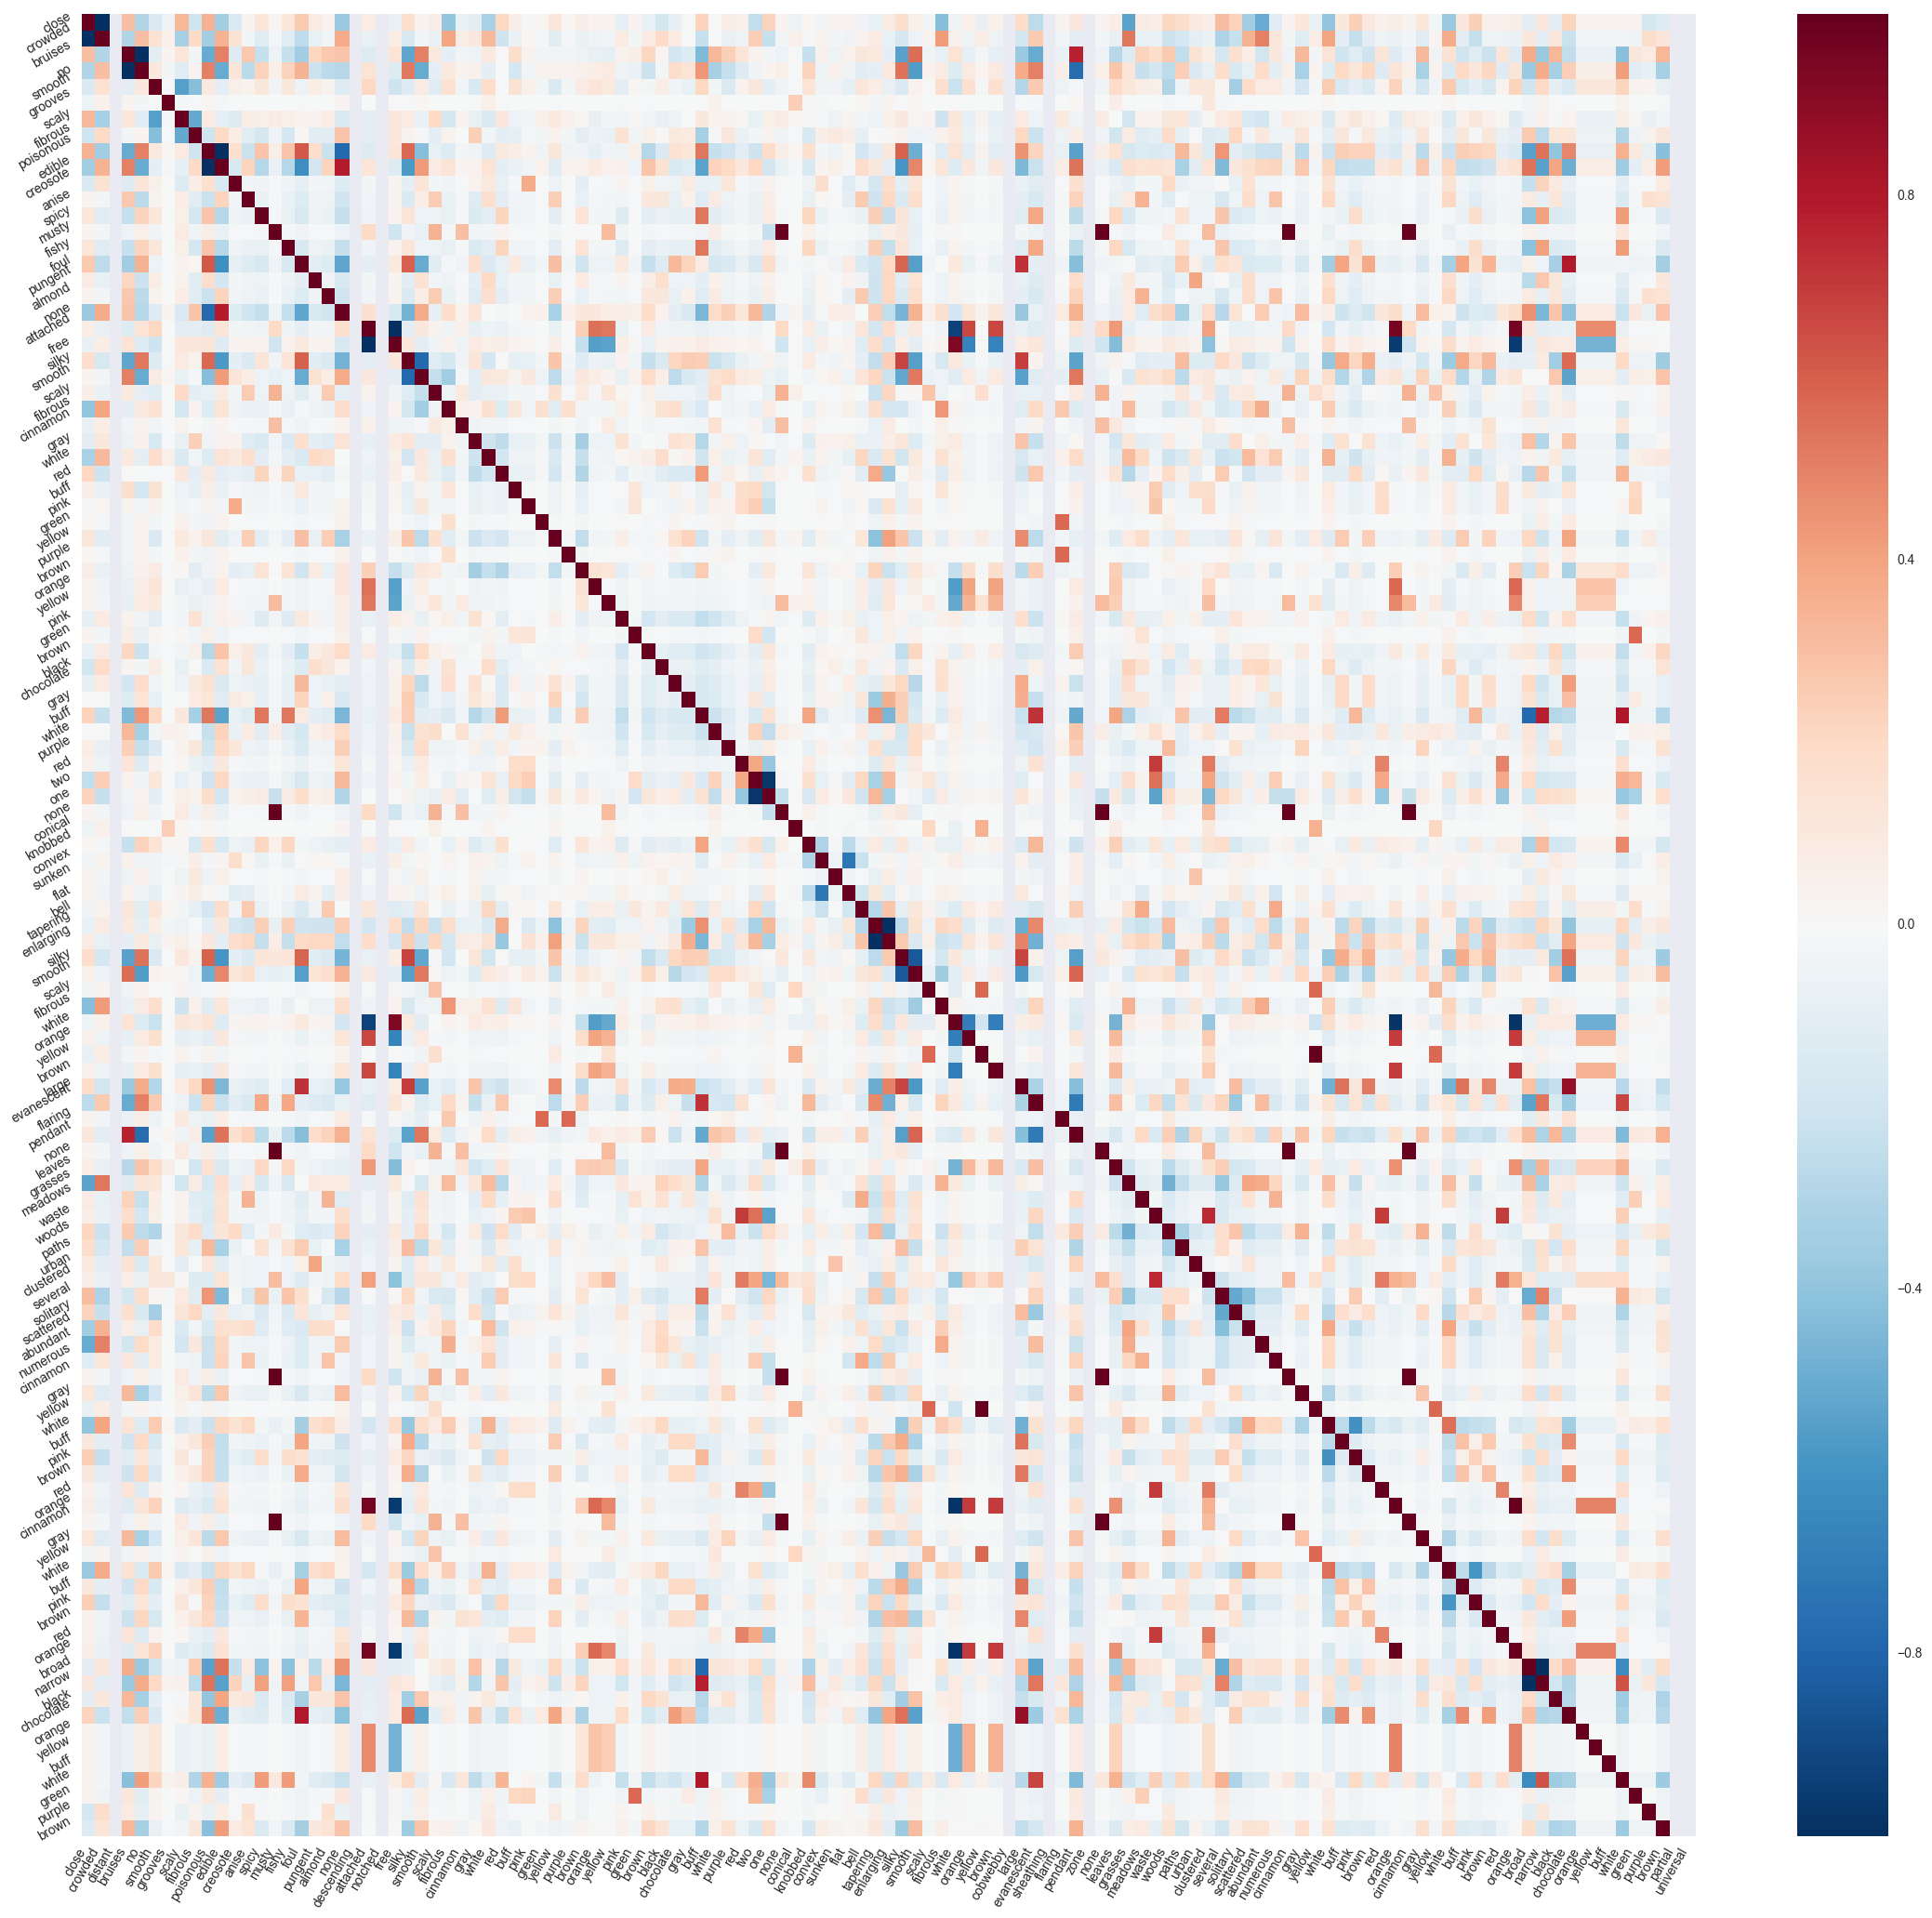

In [22]:

df = get_data_frame()
attr_dict = get_attribute_dictionary()

data = []
for attribute in attr_dict:
    for sub_attr in attr_dict[attribute]:
        data.append((attr_dict[attribute][sub_attr],[1 if x==sub_attr else 0 for x in df[attribute]]))

        l = [x[1] for x in data]
    
corr_df = pd.DataFrame(np.array(l).transpose(), columns=[x[0] for x in data]).corr().dropna(thresh=1).drop("distant")


fig, ax = plt.subplots(figsize=(28,28))

sns.heatmap(corr_df)
fig.autofmt_xdate()

locs, labels = plt.yticks()
plt.setp(labels,rotation=30)

locs, labels = plt.xticks()
plt.setp(labels,rotation=60)


plt.show()


As you can see, there are way too many attributes to look at this chart alone. 

To see some of the more strongly correlated attributes more closely, we decide to create some heat maps displaying the relative frequencies by the column for any two variables. Below is our function to plot these heat maps.

In [39]:
def heatmap(attr1, attr2,annot=True):
    df = get_data_frame_with_miss()
    labels1 = get_attribute_dictionary_with_miss()[attr1]
    labels2 = get_attribute_dictionary_with_miss()[attr2]

    data = []

    for a in df[attr1].cat.categories:
        column = df[attr2][df[attr1] == a].value_counts()/len(df[df[attr1]==a])
        data.append(column)

    d = pd.concat(data, axis=1)
    d.columns = [labels1[a] for a in df[attr1].cat.categories]

    ticks = [labels2[a] for a in d.index]

    sns.heatmap(d, annot=annot, yticklabels=ticks, fmt='.2f')


    plt.title("{} and {}".format(attr1, attr2))
    plt.yticks(rotation=0)
    plt.ylabel(attr2)
    plt.xlabel(attr1)
    plt.tight_layout()
    plt.show()
    plt.clf()

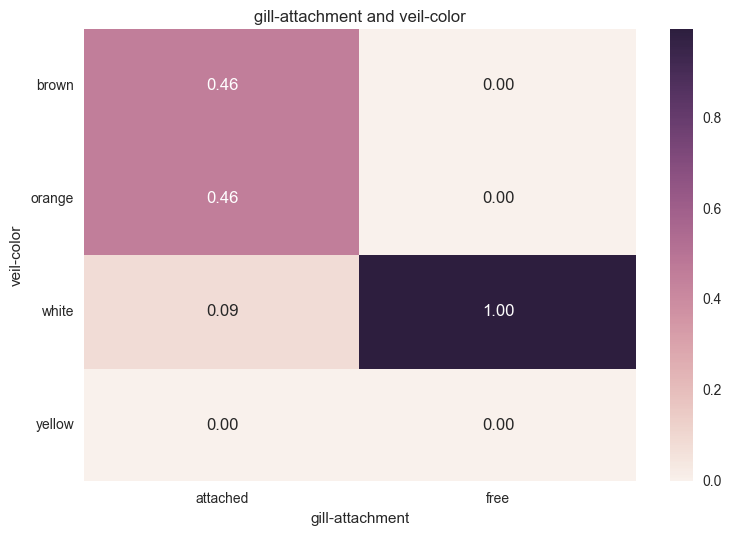

In [40]:
heatmap('gill-attachment', 'veil-color')

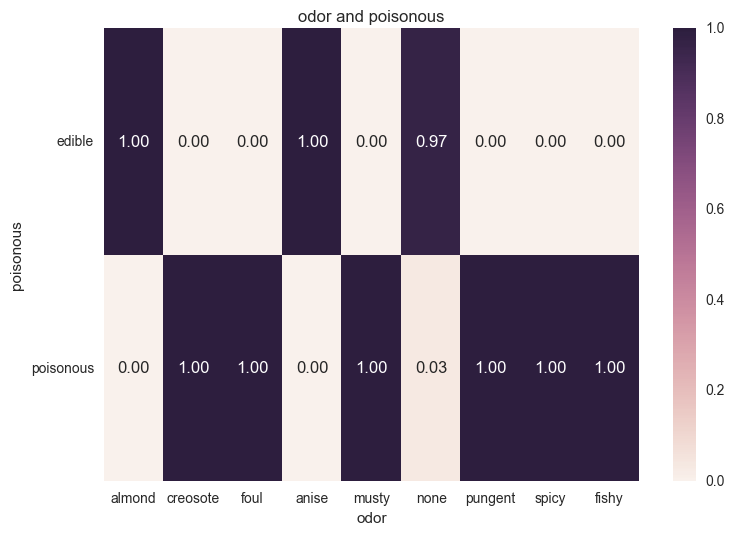

In [41]:
heatmap('odor', 'poisonous')

We found that odor and whether or not the mushroom was poisonous to be a highly correlated feature, with some odors having a 100% relative frequency with being poisonous.

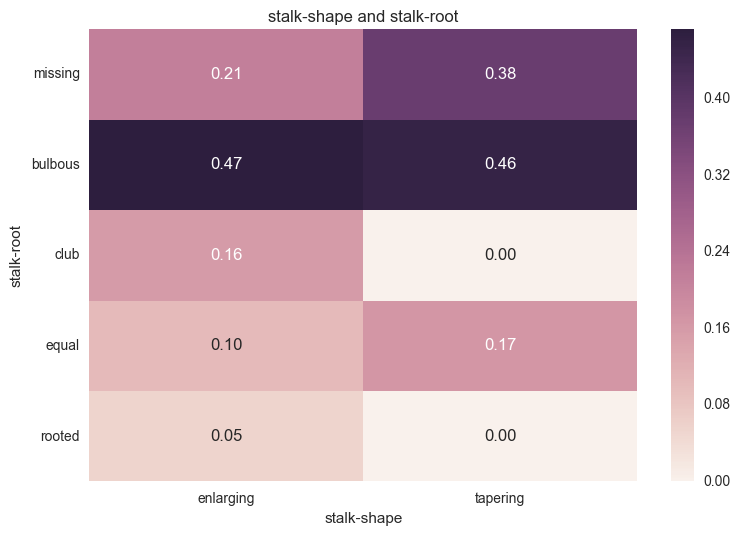

In [42]:
heatmap('stalk-shape', 'stalk-root')

We ended up dropping the stalk-root attribute due to 25% of the rows missing a stalk-root value.  We thought the heat map was still interesting enough to include it anyways. It shows how the stalk root values could have been imputed by looking at the stalk shape had we decided that the stalk root variable was important enough to keep. 

In [43]:
from IPython.display import IFrame
#Visualization forked from: https://bl.ocks.org/mbostock/1044242
IFrame("./visualizations/edge-chart/index.html",width=1000,height=0)

This hierarchical edge bundling graph represents how often each category matches with another one. If two attribute values are in the same row at least X amount of times they appear in the graph.  The bar on top of the graph can be altered in order to show only connections meeting a certain number of minimum common connections.

As you can see, when we move the bar all the way to the right, we see that the most common combination of attribute values is veil-type partial, veil-color white and gill-attachment free. This observation matches up with our previous analysis.   

However, when moving the bar to the complete opposite side, the graph starts showing more about the data that isn't there. For example, there are attribute values that have zero lines connecting from them at 25 minimum, thus showing how minor of a percentage they each are. These attribute value also seem to match up with the other conclusions we derived.

## Attempting MCA
As we only have categorical and binary data, we decided to attempt an MCA to reduce the number of features we were looking at.  If we had numerical data we would have used PCA.

Unfortunately, we lacked the background to implement MCA from scratch and could not get the MCA python module to work properly due to the lack of documentation and examples online.  Here is as far as we could get using the example at: http://nbviewer.jupyter.org/github/esafak/mca/blob/master/docs/mca-BurgundiesExample.ipynb.



In [ ]:
import mca
import pandas as pd
import numpy as np

df = get_data_frame()

mca_ben = mca.mca(df,cols=["gill-color","stalk-surface-above-ring","ring-type","spore-print-color"], ncols=5)
mca_ind = mca.mca(df,cols=["gill-color","stalk-surface-above-ring","ring-type","spore-print-color"], ncols=5, benzecri=False)

print(mca_ben)
print(mca_ind)

At this point we were stuck as we were not familiar enough with MCA to keep up with the example.  The library lacks further documentation and while we tried to implement the rest of it we could not proceed as far as the original owner of the example Jupyter Notebook did. However, we feel that we could have done a lot with MCA as the majority of our attributes are correlated fairly high with at least one other attribute (based on our heatmaps).

## Citations
Data set: https://archive.ics.uci.edu/ml/datasets/Mushroom  
For picture 1: http://michaelagleatonportfolio2014.weebly.com/blue-milk-mushroom.html   
Data Visualization Information: https://github.com/eclarson/MachineLearningNotebooks/blob/master/03.%20DataVisualization.ipynb   
D3 Hierchial Edge Bundling: https://bl.ocks.org/mbostock/1044242